## Model 1 | Dropping some columns on assumptions and basic understanding

In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

In [2]:
data = pd.read_csv('bank-full.csv')
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [4]:
# Dropping values which seems irrelevant
data_1 = data.drop(['contact','day','month','duration','pdays','campaign','previous','poutcome'], axis=1)
data_1.head()

,age,job,marital,education,default,balance,housing,loan,y
0,58,management,married,tertiary,no,2143,yes,no,no
1,44,technician,single,secondary,no,29,yes,no,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,no
3,47,blue-collar,married,unknown,no,1506,yes,no,no
4,33,unknown,single,unknown,no,1,no,no,no


In [5]:
# Defining a functin to convert all categorical columns to label encoded columns
l_en = LabelEncoder()
def encoded_dataset(subset):
    for i in subset.select_dtypes(include='object'):
        col_name = i + '_enc'
        subset[col_name] = l_en.fit_transform(subset[i])
        # Dropping the original columns containing which we are converting
        subset.drop([i], axis=1, inplace=True)
    return subset

In [6]:
# Label Encoded Dataset 
encoded_subset1 = encoded_dataset(data_1)
encoded_subset1.head()

,age,balance,job_enc,marital_enc,education_enc,default_enc,housing_enc,loan_enc,y_enc
0,58,2143,4,1,2,0,1,0,0
1,44,29,9,2,1,0,1,0,0
2,33,2,2,1,1,0,1,1,0
3,47,1506,1,1,3,0,1,0,0
4,33,1,11,2,3,0,0,0,0


### Applying feature selection on remaining encoded values | Univariate Selection

In [7]:
# Separating X and Y variables 
x_f = encoded_subset1.iloc[:, :8]
y_f = encoded_subset1.iloc[:, 8]
x_f.head(5)

,age,balance,job_enc,marital_enc,education_enc,default_enc,housing_enc,loan_enc
0,58,2143,4,1,2,0,1,0
1,44,29,9,2,1,0,1,0
2,33,2,2,1,1,0,1,1
3,47,1506,1,1,3,0,1,0
4,33,1,11,2,3,0,0,0


In [8]:
from sklearn.feature_selection import SelectKBest, f_classif, chi2

# Wanted to choose best 6 features from statistical function f_classif
test = SelectKBest(score_func=f_classif, k=6)
feature_sel = test.fit(x_f, y_f)

# Creating a dataframe of features scores
d1 = pd.DataFrame(feature_sel.scores_).T
d1.columns = x_f.columns
d1.head()


,age,balance,job_enc,marital_enc,education_enc,default_enc,housing_enc,loan_enc
0,28.625233,126.572276,74.048351,94.150026,199.242825,22.733923,892.950576,211.167395


In [9]:
# Applying the feature selection on our dataset based on above scores
# Lowest 2 scores will be removed from the dataset (As we had 9 columns and we choose to select best 6 features)
x_f_reduced = pd.DataFrame(feature_sel.fit_transform(x_f, y_f))
x_f_reduced.head()

,0,1,2,3,4,5
0,2143,4,1,2,1,0
1,29,9,2,1,1,0
2,2,2,1,1,1,1
3,1506,1,1,3,1,0
4,1,11,2,3,0,0


In [10]:
x_f.head()

,age,balance,job_enc,marital_enc,education_enc,default_enc,housing_enc,loan_enc
0,58,2143,4,1,2,0,1,0
1,44,29,9,2,1,0,1,0
2,33,2,2,1,1,0,1,1
3,47,1506,1,1,3,0,1,0
4,33,1,11,2,3,0,0,0


In [11]:
# Assigning the column names to the transformed dataset
# 1. Dropping by selecting the index of min value of the row 

# print(d1.iloc[0])
# print(d1.iloc[0].idxmin()) # will return the index of minimum value in d1.loc[0] series 

# dropping the lowest score column 
d1.drop(d1.iloc[0].idxmin(), axis=1, inplace=True)

# dropping the 2nd lowest score column
d1.drop(d1.iloc[0].idxmin(), axis=1, inplace=True)

d1.head()


,balance,job_enc,marital_enc,education_enc,housing_enc,loan_enc
0,126.572276,74.048351,94.150026,199.242825,892.950576,211.167395


In [12]:
# Assigning column names from the above reduced dataframe d1
x_f_reduced.columns = d1.columns
x_f_reduced.head()

,balance,job_enc,marital_enc,education_enc,housing_enc,loan_enc
0,2143,4,1,2,1,0
1,29,9,2,1,1,0
2,2,2,1,1,1,1
3,1506,1,1,3,1,0
4,1,11,2,3,0,0


In [13]:
# to check the column name mapping is done correctly or not
x_f.head()

,age,balance,job_enc,marital_enc,education_enc,default_enc,housing_enc,loan_enc
0,58,2143,4,1,2,0,1,0
1,44,29,9,2,1,0,1,0
2,33,2,2,1,1,0,1,1
3,47,1506,1,1,3,0,1,0
4,33,1,11,2,3,0,0,0


In [14]:
# Cannot use chi2 as balance column contains -ve value

# test2 = SelectKBest(score_func=chi2, k=6)
# feature_sel_2 = test2.fit(x_f, y_f)

# d2 = pd.DataFrame(feature_sel_2.scores_).T
# d2.columns = x_f.columns
# d2

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

X_train, X_test, y_train, y_test = train_test_split(x_f_reduced, y_f, test_size=0.2, random_state=45)

model = LogisticRegression()
model.fit(X_train, y_train)
model_pred = model.predict(X_train)

confusion_matrix(y_train, model_pred)


C:\Users\Ridaan\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([[31918,     8],
       [ 4240,     2]], dtype=int64)

In [16]:
print(classification_report(y_train, model_pred))

              precision    recall  f1-score   support

           0       0.88      1.00      0.94     31926
           1       0.20      0.00      0.00      4242

    accuracy                           0.88     36168
   macro avg       0.54      0.50      0.47     36168
weighted avg       0.80      0.88      0.83     36168



In [17]:
test_pred = model.predict(X_test)
confusion_matrix(y_test, test_pred)



array([[7995,    1],
       [1047,    0]], dtype=int64)

In [18]:
print(classification_report(y_test, test_pred))

              precision    recall  f1-score   support

           0       0.88      1.00      0.94      7996
           1       0.00      0.00      0.00      1047

    accuracy                           0.88      9043
   macro avg       0.44      0.50      0.47      9043
weighted avg       0.78      0.88      0.83      9043



### Using sweetviz to analyze the data (correlation coefficients)
#### Since all features have correlation factor with dependent variable as close as to 0. It didn't help much.

In [19]:
import sweetviz as sv
sweet_report = sv.analyze(data, target_feat='y')
sweet_report.show_html('term_deposit.html')

                                             |                                             | [  0%]   00:00 ->…

Report term_deposit.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


## Model 2

### Dropping unnecessary columns based on assumption including education, job

In [20]:
dataset2 = data.drop(['contact','day','month','duration','pdays','previous','poutcome','campaign','education','job'], axis=1)

In [21]:
dataset2.head()

,age,marital,default,balance,housing,loan,y
0,58,married,no,2143,yes,no,no
1,44,single,no,29,yes,no,no
2,33,married,no,2,yes,yes,no
3,47,married,no,1506,yes,no,no
4,33,single,no,1,no,no,no


In [22]:
dataset2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   age      45211 non-null  int64 
 1   marital  45211 non-null  object
 2   default  45211 non-null  object
 3   balance  45211 non-null  int64 
 4   housing  45211 non-null  object
 5   loan     45211 non-null  object
 6   y        45211 non-null  object
dtypes: int64(2), object(5)
memory usage: 2.4+ MB


### Preprocessing data | Converting cateogrical values through LabelEncoder

In [23]:
# First tried to encode a single column one at a time 
# from sklearn.preprocessing import LabelEncoder
# import numpy as np

# l_en = LabelEncoder()
# marital_en = l_en.fit_transform(data['marital'])
# print(marital_en[:5])
# np.unique(marital_en)

In [24]:
encoded_dataset2 = encoded_dataset(dataset2)
encoded_dataset2.head()

,age,balance,marital_enc,default_enc,housing_enc,loan_enc,y_enc
0,58,2143,1,0,1,0,0
1,44,29,2,0,1,0,0
2,33,2,1,0,1,1,0
3,47,1506,1,0,1,0,0
4,33,1,2,0,0,0,0


### Splitting the dependent and independent variables

In [25]:
y = encoded_dataset2['y_enc']
X = encoded_dataset2.iloc[:,:6]
print(y.head())
print(X.head())

0    0
1    0
2    0
3    0
4    0
Name: y_enc, dtype: int32
   age  balance  marital_enc  default_enc  housing_enc  loan_enc
0   58     2143            1            0            1         0
1   44       29            2            0            1         0
2   33        2            1            0            1         1
3   47     1506            1            0            1         0
4   33        1            2            0            0         0


### Splitting into train and test datasets

In [26]:
# Splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=45)

model_2 = LogisticRegression()
model_2.fit(X_train, y_train)
model_pred = model_2.predict(X_train)

confusion_matrix(y_train, model_pred)

array([[31917,     9],
       [ 4238,     4]], dtype=int64)

In [27]:
# Classification Report for training data
print(classification_report(y_train, model_pred))

              precision    recall  f1-score   support

           0       0.88      1.00      0.94     31926
           1       0.31      0.00      0.00      4242

    accuracy                           0.88     36168
   macro avg       0.60      0.50      0.47     36168
weighted avg       0.82      0.88      0.83     36168



In [28]:
test_pred = model_2.predict(X_test)
confusion_matrix(y_test, test_pred)

array([[7995,    1],
       [1047,    0]], dtype=int64)

In [29]:
# Classification report for testing data
print(classification_report(y_test, test_pred))

              precision    recall  f1-score   support

           0       0.88      1.00      0.94      7996
           1       0.00      0.00      0.00      1047

    accuracy                           0.88      9043
   macro avg       0.44      0.50      0.47      9043
weighted avg       0.78      0.88      0.83      9043



## No difference in the performance of the model when we dropped two extra features in Model2

## Model 3:

### Will build the model without dropping any of the columns and will choose SelectKBest out of all encoded features

In [70]:
data.head()

,age,balance,day,duration,campaign,pdays,previous,job_enc,marital_enc,education_enc,default_enc,housing_enc,loan_enc,contact_enc,month_enc,poutcome_enc,y_enc
0,58,2143,5,261,1,-1,0,4,1,2,0,1,0,2,8,3,0
1,44,29,5,151,1,-1,0,9,2,1,0,1,0,2,8,3,0
2,33,2,5,76,1,-1,0,2,1,1,0,1,1,2,8,3,0
3,47,1506,5,92,1,-1,0,1,1,3,0,1,0,2,8,3,0
4,33,1,5,198,1,-1,0,11,2,3,0,0,0,2,8,3,0


In [71]:
# Encoded all categorical columns based on the function defined above.
ec_dataset_3 = encoded_dataset(data)
ec_dataset_3.head()

,age,balance,day,duration,campaign,pdays,previous,job_enc,marital_enc,education_enc,default_enc,housing_enc,loan_enc,contact_enc,month_enc,poutcome_enc,y_enc
0,58,2143,5,261,1,-1,0,4,1,2,0,1,0,2,8,3,0
1,44,29,5,151,1,-1,0,9,2,1,0,1,0,2,8,3,0
2,33,2,5,76,1,-1,0,2,1,1,0,1,1,2,8,3,0
3,47,1506,5,92,1,-1,0,1,1,3,0,1,0,2,8,3,0
4,33,1,5,198,1,-1,0,11,2,3,0,0,0,2,8,3,0


In [72]:
# Separating X and y variables
X_all = ec_dataset_3.iloc[:, :-1]
X_all.head()

,age,balance,day,duration,campaign,pdays,previous,job_enc,marital_enc,education_enc,default_enc,housing_enc,loan_enc,contact_enc,month_enc,poutcome_enc
0,58,2143,5,261,1,-1,0,4,1,2,0,1,0,2,8,3
1,44,29,5,151,1,-1,0,9,2,1,0,1,0,2,8,3
2,33,2,5,76,1,-1,0,2,1,1,0,1,1,2,8,3
3,47,1506,5,92,1,-1,0,1,1,3,0,1,0,2,8,3
4,33,1,5,198,1,-1,0,11,2,3,0,0,0,2,8,3


In [73]:
# Scale the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_X_all = scaler.fit_transform(X_all)
scaled_X_all[0]

array([ 1.60696496,  0.25641925, -1.29847633,  0.0110161 , -0.56935064,
       -0.41145311, -0.25194037, -0.10381968, -0.27576178,  1.03636182,
       -0.13548989,  0.89391541, -0.43680347,  1.51430611,  0.82377336,
        0.44489814])

In [74]:
y_all = ec_dataset_3.iloc[:, -1]
y_all.head()

0    0
1    0
2    0
3    0
4    0
Name: y_enc, dtype: int32

In [75]:
# Wanted to choose best 6 features from statistical function f_classif
feature_model = SelectKBest(score_func=f_classif, k=6)
feature_sel_3 = feature_model.fit(scaled_X_all, y_all)

d3 = pd.DataFrame(feature_sel_3.scores_)
d3.index = X_all.columns
print(d3)

#print(d3.sort_values([0], ascending=False)[:6])
best_features = d3.sort_values([0], ascending=False)[:6]
best_features

                         0
age              28.625233
balance         126.572276
day              36.359010
duration       8333.761148
campaign        243.358404
pdays           490.696563
previous        396.443989
job_enc          74.048351
marital_enc      94.150026
education_enc   199.242825
default_enc      22.733923
housing_enc     892.950576
loan_enc        211.167395
contact_enc    1017.965930
month_enc        27.089689
poutcome_enc    275.596872


,0
duration,8333.761148
contact_enc,1017.965930
housing_enc,892.950576
pdays,490.696563
previous,396.443989
poutcome_enc,275.596872


In [76]:
feature_sel_3

SelectKBest(k=6)

In [43]:
# List 1 containing sorted best features based on scores
list_best_features = list(best_features.index)

# List 2 of all original columns
list_of_all_columns = list(X_all.columns)

# will retrieve the best feature column names in the original order
model_features = [feature for feature in list_of_all_columns if feature in list_best_features ]
model_features

['duration', 'pdays', 'previous', 'housing_enc', 'contact_enc', 'poutcome_enc']

In [44]:
# To compare the values and the corresponding column names
scaled_X_all[0]

array([ 1.60696496,  0.25641925, -1.29847633,  0.0110161 , -0.56935064,
       -0.41145311, -0.25194037, -0.10381968, -0.27576178,  1.03636182,
       -0.13548989,  0.89391541, -0.43680347,  1.51430611,  0.82377336,
        0.44489814])

In [45]:
# Applying feature selection model (SelectKBest) and assigning column names as well
X_all_reduced = pd.DataFrame(feature_sel_3.transform(scaled_X_all))
X_all_reduced.columns = model_features
X_all_reduced.head()

,duration,pdays,previous,housing_enc,contact_enc,poutcome_enc
0,0.011016,-0.411453,-0.25194,0.893915,1.514306,0.444898
1,-0.416127,-0.411453,-0.25194,0.893915,1.514306,0.444898
2,-0.707361,-0.411453,-0.25194,0.893915,1.514306,0.444898
3,-0.645231,-0.411453,-0.25194,0.893915,1.514306,0.444898
4,-0.233620,-0.411453,-0.25194,-1.118674,1.514306,0.444898


In [46]:
# Splitting into X and y train and test 
X_train, X_test, y_train, y_test = train_test_split(X_all_reduced, y_all, test_size=0.2, random_state=45)

model_3 = LogisticRegression()
model_3.fit(X_train, y_train)
model_pred = model_3.predict(X_train)

confusion_matrix(y_train, model_pred)

array([[31350,   576],
       [ 3384,   858]], dtype=int64)

In [47]:
print(classification_report(y_train, model_pred))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94     31926
           1       0.60      0.20      0.30      4242

    accuracy                           0.89     36168
   macro avg       0.75      0.59      0.62     36168
weighted avg       0.87      0.89      0.87     36168



In [48]:
test_pred = model_3.predict(X_test)

confusion_matrix(y_test, test_pred)

array([[7855,  141],
       [ 825,  222]], dtype=int64)

In [49]:
print(classification_report(y_test, test_pred))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94      7996
           1       0.61      0.21      0.31      1047

    accuracy                           0.89      9043
   macro avg       0.76      0.60      0.63      9043
weighted avg       0.87      0.89      0.87      9043



## No major performance improvement from 88% to 89%. But from SelectKBest features selection, got to know that we are dropping most importanat features in the beginning which could have created a problem. 

### AUC - ROC Curve


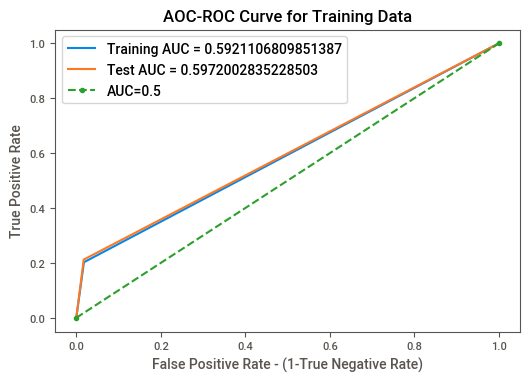

In [68]:
from sklearn.metrics import roc_auc_score, roc_curve
from matplotlib import pyplot as plt

fpr, tpr , thrs = roc_curve(y_train, model_pred)
fpr_t, tpr_t, thrs_tpr = roc_curve(y_test, test_pred)

plt.plot(fpr, tpr, label = f'Training AUC = {roc_auc_score(y_train, model_pred)}')
plt.plot(fpr_t, tpr_t, '-', label = f'Test AUC = {roc_auc_score(y_test, test_pred)}')
plt.title('AOC-ROC Curve for Training Data')
plt.plot([0,1],[0,1], 'o--', label ='AUC=0.5')

plt.xlabel('False Positive Rate - (1-True Negative Rate)')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

## Precision - Recall Curve

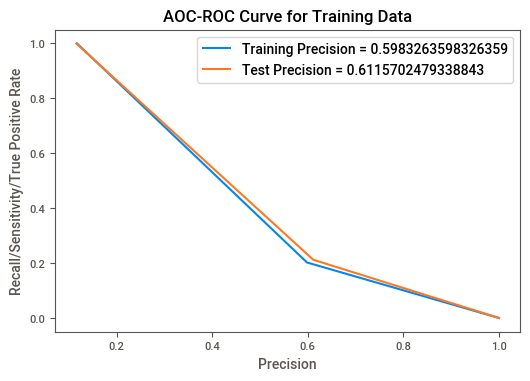

In [124]:
from sklearn.metrics import precision_score, precision_recall_curve

precision, recall , thrs = precision_recall_curve(y_train, model_pred)
precision_test, recall_test, thrs_test = precision_recall_curve(y_test, test_pred)

plt.plot(precision, recall, label = f'Training Precision = {precision_score(y_train, model_pred)}')
plt.plot(precision_test, recall_test, '-', label = f'Test Precision = {precision_score(y_test, test_pred)}')
plt.title('AOC-ROC Curve for Training Data')

plt.xlabel('Precision')
plt.ylabel('Recall/Sensitivity/True Positive Rate')
plt.legend()
plt.show()


### Applying RFE (Recursive Feature Selection) 

In [92]:
# Applying RFE feature selection technique to select most important features
from sklearn.feature_selection import RFE

X_train, X_test, y_train, y_test = train_test_split(scaled_X_all, y_all, test_size=0.2, random_state=45)

model_4 = LogisticRegression()
rfe = RFE(model_4, n_features_to_select=6)
fit = rfe.fit(X_train, y_train)
model_4_pred = fit.predict(X_train)

confusion_matrix(y_train, model_4_pred)

array([[31326,   600],
       [ 3373,   869]], dtype=int64)

In [79]:
print(classification_report(y_train, model_4_pred))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94     31926
           1       0.59      0.21      0.31      4242

    accuracy                           0.89     36168
   macro avg       0.75      0.59      0.62     36168
weighted avg       0.87      0.89      0.87     36168



In [119]:
fit.n_features_

6

In [113]:
# Return list of features as True which are important
fit.support_

array([False, False, False,  True,  True,  True, False, False, False,
       False, False,  True,  True,  True, False, False])

In [110]:
col_list = list(X_all.columns)
a = [(col, col_list.index(col)) for col in col_list]
a

[('age', 0),
 ('balance', 1),
 ('day', 2),
 ('duration', 3),
 ('campaign', 4),
 ('pdays', 5),
 ('previous', 6),
 ('job_enc', 7),
 ('marital_enc', 8),
 ('education_enc', 9),
 ('default_enc', 10),
 ('housing_enc', 11),
 ('loan_enc', 12),
 ('contact_enc', 13),
 ('month_enc', 14),
 ('poutcome_enc', 15)]

In [102]:
fit.support_[3]

True

In [112]:
col_list = list(X_all.columns)

features = [ col for col in col_list if fit.support_[col_list.index(col)]]
features

['duration', 'campaign', 'pdays', 'housing_enc', 'loan_enc', 'contact_enc']